## Problem2: Plotting a function
### Problem 2a

In [84]:
import numpy as np


# defining a simple function contaions parameters 
def function(a, b, x):
    return a*np.cos(x)+b*np.sin(2*x)

### Problem 2b

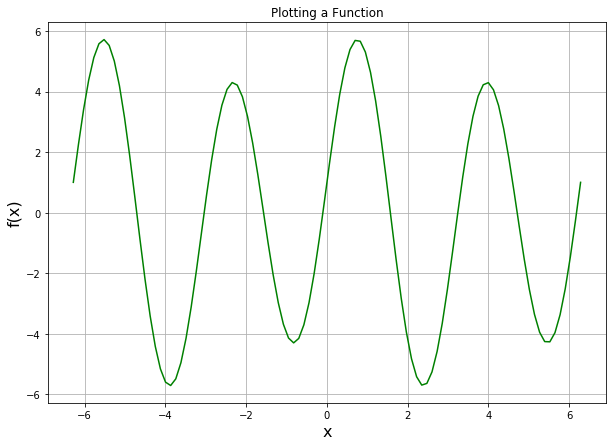

In [85]:
import matplotlib.pyplot as plt

# suitable range in x axis
x = np.linspace(-2*np.pi, 2*np.pi, 100)

# improve plot by adding x and y labels
plt.figure(figsize = (10, 7))
plt.plot(x, function(1, 5, x), 'g')
plt.title('Plotting a Function')
plt.xlabel('x', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.grid()
plt.show()


### Problem 2c

In [86]:
# define necessary libraries

import matplotlib.pyplot as plt
import numpy as np

In [87]:
# define the right side of equation as a function 
def func_N(N0, mu, K, t):
    return K/(1+((K/N0)-1)*np.exp(-mu*t))

At first, we will just try for a specific set of parameters to see the output:

Text(0.5, 1.0, 'N0 = 0.1, mu = 1, K = 30')

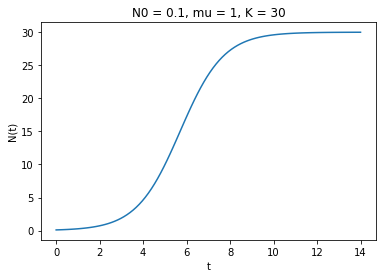

In [88]:
N0 = 0.1
MU = 1
K = 30

t = np.linspace(0, 14, 100)
plt.plot(t, func_N(N0, MU, K, t))
plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('N0 = 0.1, mu = 1, K = 30')

Now we can try a range of parameters. Feel free to change them and see what happens.

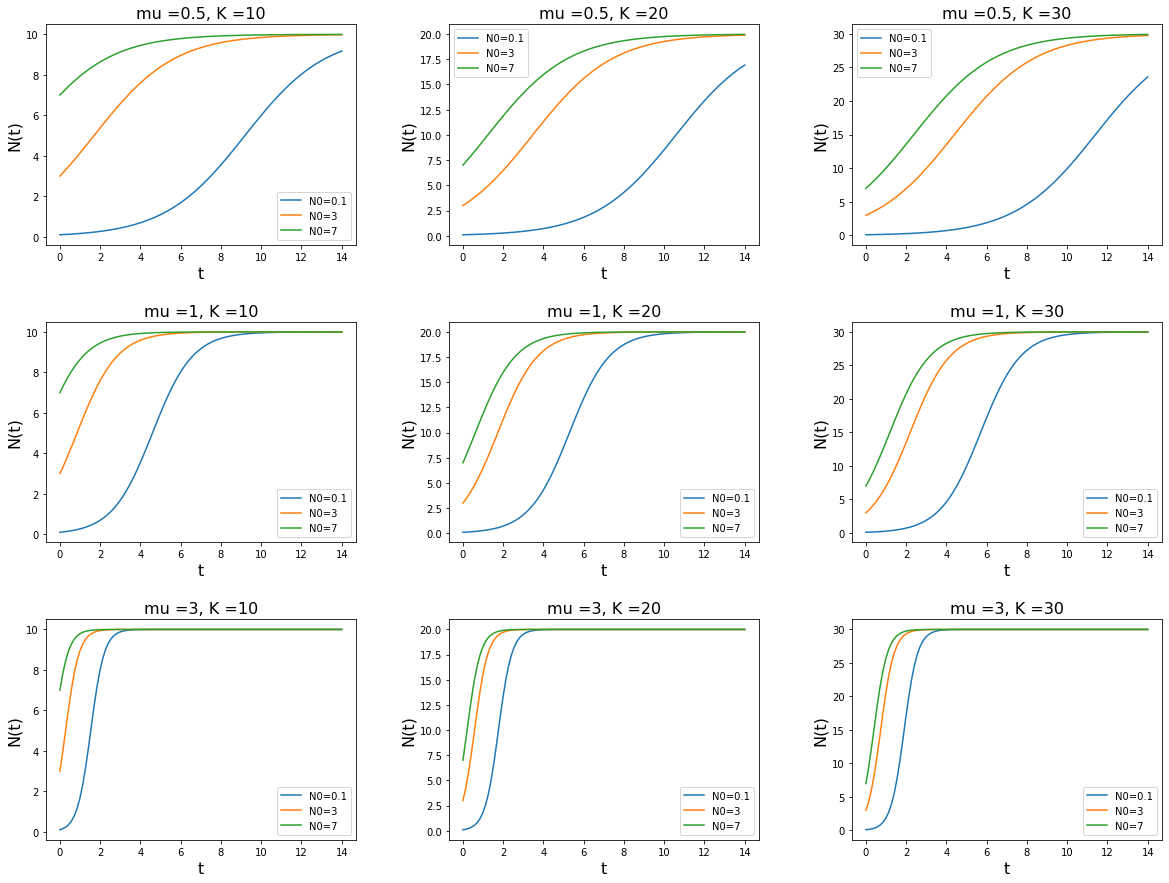

In [89]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))
plt.subplots_adjust(wspace=.3, hspace=0.35)

# plot function for various range of parameters
N0 = [0.1,3,7]
MU = [0.5,1,3]
K = [10,20,30]

t = np.linspace(0, 14, 100)

for MUi_idx, MUi in enumerate(MU):
    for Ki_idx, Ki in enumerate(K):
        for ni_idx, ni in enumerate(N0):
            lb = 'N0='+str(ni)
            title = 'mu ='+str(MUi)+', K ='+str(Ki)
            ax[MUi_idx,Ki_idx].plot(t, func_N(ni, MUi, Ki, t), label = lb)
            ax[MUi_idx,Ki_idx].set_xlabel('t', fontsize = 16)
            ax[MUi_idx,Ki_idx].set_ylabel('N(t)', fontsize = 16)
            ax[MUi_idx,Ki_idx].set_title(title, fontsize = 16)
            ax[MUi_idx,Ki_idx].legend()



### Problem 2d

We can show that $N(t)=\frac{K}{1+\big(\frac{K}{N_0}-1\big)e^{-\mu t} }$ is the soultion to this differential equation $\frac{dN}{dt}=\mu N \left(1-\frac{N}{K}\right)$, by plugging "N(t)" into the equation:

left side $\frac{\mu K\big(\frac{K}{N_0}-1\big)e^{-\mu t}}{(1+\big(\frac{K}{N_0}-1\big)e^{-\mu t} )^2}$

right side $\mu \big( \frac{K}{1+\big(\frac{K}{N_0}-1\big)e^{-\mu t} } - \frac{K}{(1+\big(\frac{K}{N_0}-1\big)e^{-\mu t})^2 } \big) = \mu K \frac{\big(\frac{K}{N_0}-1\big)e^{-\mu t}}{(1+\big(\frac{K}{N_0}-1\big)e^{-\mu t})^2 }$

Since these are equal, $N(t)$ satisfies this differential equation.


## Problem3: Numerical integration 1

In [90]:
# import necessary libraries for numerical integration
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import odeint

Here in the continue for simplicity we use our logistic population growth equation as a $f(x)$, and also only for $\mu$ and $K$. Feel free to change other parameters and compare with plots in __Problem 2__.

In [91]:
# define function
def f1(y, t):
    mu =1
    K = 30
    dy = mu * y * (1-(y/K))
 
    return dy

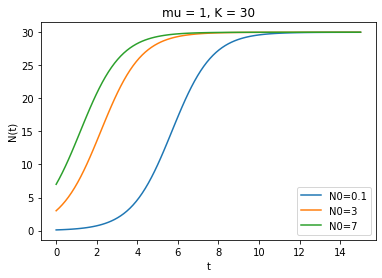

In [92]:
t = np.linspace(0,15,100)

# plot function for various range of parameters
N0 = [0.1,3,7]
for N0i in N0:
    lb = 'N0='+str(N0i)
    y = odeint(f1, N0i, t)
    plt.plot(t,y,label = lb)

plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('mu = 1, K = 30')
plt.legend()


Now we can compare the results obtained by both above methods (with problem 2)

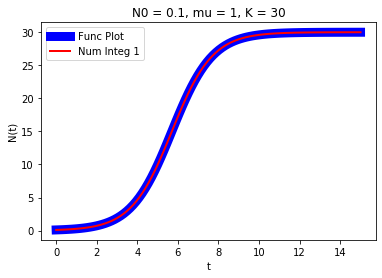

In [99]:
N0 = 0.1
MU = 1
K = 30

t = np.linspace(0,15,100)

# ploting result using function plot
plt.plot(t, func_N(N0, MU, K, t), c = 'b', label = 'Func Plot', linewidth=9)

# ploting result using numerical integration 1
y_num_int_1 = odeint(f1, N0, t)
plt.plot(t,y_num_int_1, c = 'r', label = 'Num Integ 1', linewidth=2)

# -------------
plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('N0 = 0.1, mu = 1, K = 30')
plt.legend()

As you can see they exactly match to each other.

## Problem4: Numerical integration 2

In [100]:
# define function with the same parameters as problem 3 just for comparison
def f2(y):
    mu = 1
    K = 30
    dy = mu * y * (1-(y/K))
 
    return dy

In the following cell we see the result of Euler method for only one set of parameter $\mu = 1, K = 30, N0 = 0.1, dt = 0.01$ for more clarity. In the next cell we will plot the results for various values of $N0$ and $dt$.

Text(0, 0.5, 'N(t)')

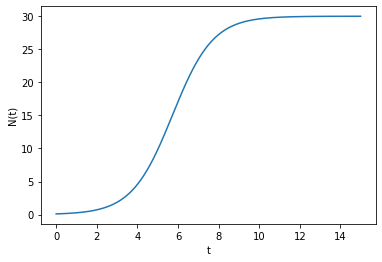

In [101]:
# step and the grid for integration
dti = 0.01
t = np.arange(0, 15, dti)


N = np.zeros(len(t))
N[0]=0.1

for i in range(0, len(t) - 1):
    N[i+1] = N[i] + dti*f2(N[i])
    
plt.plot(t, N)

# ---------

plt.xlabel('t')
plt.ylabel('N(t)')


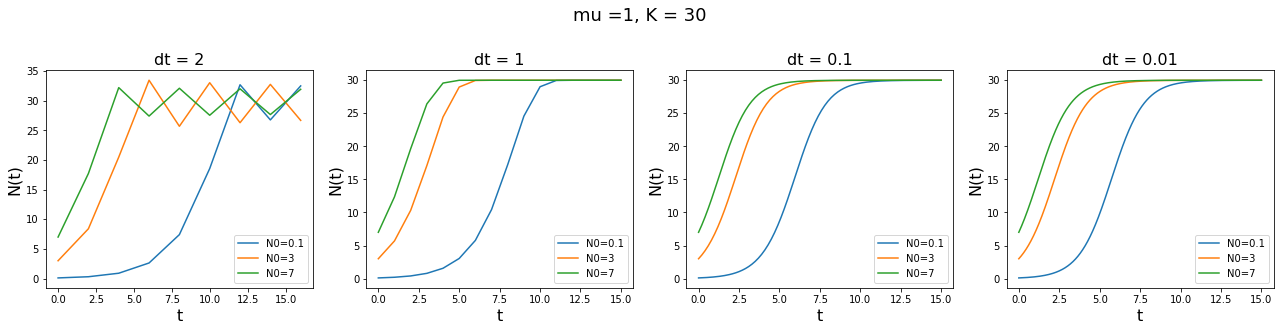

In [102]:
fig, ax = plt.subplots(1, 4, figsize=(22,4))
plt.subplots_adjust(hspace = 0.2)
plt.suptitle("mu =1, K = 30", fontsize=18, y=1.1)

N0 = [0.1,3,7]
dt = [2, 1, 0.1,0.01]

for dt_idx,dti in enumerate(dt):
    for ni in N0:
        t = np.arange(0, 15 + dti, dti)
        N = np.zeros(len(t))
        N[0]=ni
        lb = 'N0='+str(ni)
        title =  'dt = '+str(dti)

        for i in range(0, len(t) - 1):
            N[i+1] = N[i] + dti*f2(N[i])

        ax[dt_idx].plot(t, N, label = lb)
        ax[dt_idx].set_xlabel('t', fontsize = 16)
        ax[dt_idx].set_ylabel('N(t)', fontsize = 16)
        ax[dt_idx].set_title(title, fontsize = 16)
        ax[dt_idx].legend()


With larger timestep the solution is not precise. A proper timestep should be <= 0.1

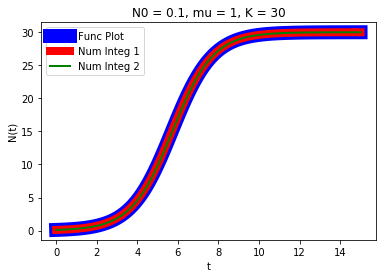

In [103]:
N0 = 0.1
MU = 1
K = 30
dti = 0.01

t = np.linspace(0,15,100)
# -------------
# ploting result using function plot
plt.plot(t, func_N(N0, MU, K, t), c = 'b', label = 'Func Plot', linewidth=14)

# -------------
# ploting result using numerical integration 1
y_num_int_1 = odeint(f1, N0, t)
plt.plot(t,y_num_int_1, c = 'r', label = 'Num Integ 1', linewidth=8)

# -------------
# ploting result using numerical integration 2
t = np.arange(0, 15 + dti, dti)
N = np.zeros(len(t))
N[0]=N0
for i in range(0, len(t) - 1):
    N[i+1] = N[i] + dti*f2(N[i])

plt.plot(t,N, c = 'g', label = 'Num Integ 2', linewidth=2)

# -------------
plt.xlabel('t')
plt.ylabel('N(t)')
plt.title('N0 = 0.1, mu = 1, K = 30')
plt.legend()

The solution by all three methods are in agreement.